# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [67]:
#data_dir = '/input'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


#"""
#DON'T MODIFY ANYTHING IN THIS CELL
#"""
#import helper

#helper.download_extract('mnist', data_dir)
#helper.download_extract('celeba', data_dir)

In [68]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

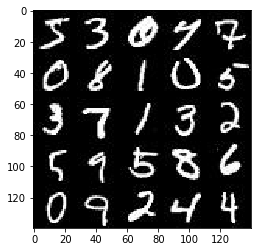

In [69]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

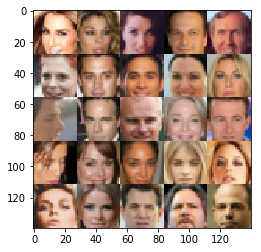

In [70]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [71]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0


/Users/RobertDJarvis/anaconda/envs/tensorflow/lib/python3.5/site-packages/ipykernel/__main__.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [72]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    real_input_images = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='real_input_images')
    z_input = tf.placeholder(tf.float32, (None, z_dim), name='z_input')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')
    return real_input_images, z_input, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [124]:
from tensorflow.contrib import learn

def discriminator(images, reuse=False, alpha=0.2):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    # new_height = ((input_height - filter_height + 2 * P)/S) + 1
    
    with tf.variable_scope('discriminator', reuse=reuse):
        relu_1 = tf.layers.conv2d(images, 64, 5, strides = 2, padding="same", activation=None, kernel_initializer=tf.contrib.layers.xavier_initializer())
        relu_1 = tf.maximum(alpha * relu_1, relu_1) 
        relu_1 = tf.nn.dropout(relu_1, 0.5)
        
        #28x28x3    
    
        relu_2 = tf.layers.conv2d(relu_1, 128, 5, strides = 2, padding='same', activation=None, kernel_initializer=tf.contrib.layers.xavier_initializer())
        relu_2 = tf.layers.batch_normalization(relu_1, training=True)
        relu_2 = tf.maximum(alpha *  relu_2,  relu_2)
        relu_2 = tf.nn.dropout(relu_2, 0.5)
        # 14x14x128
    
        relu_3 = tf.layers.conv2d(relu_2, 256, 5, strides=2, padding='same', activation=None, kernel_initializer=tf.contrib.layers.xavier_initializer())
        relu_3 = tf.layers.batch_normalization(relu_2, training=True)
        relu_3 = tf.maximum(alpha * relu_3, relu_3)
        relu_3 = tf.nn.dropout(relu_3, 0.5)
        # 7x7x256

        # Flatten it
        flat = tf.reshape(relu_3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
    
        return out, logits
     


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [125]:
def generator(z, out_channel_dim, is_train=True, alpha=0.2):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    with tf.variable_scope('generator', reuse= not is_train):
       
        x1 = tf.layers.dense(z, 7*7*256)
        x1 = tf.reshape(x1, (-1, 7, 7, 256))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        x1 = tf.nn.dropout(x1, 0.5)
 
        x2 = tf.layers.conv2d_transpose(x1, 128, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        x2 = tf.nn.dropout(x2, 0.5)
       
    
        x3 = tf.layers.conv2d_transpose(x2, 64, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        x3 = tf.nn.dropout(x3, 0.5)
       
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 3, strides=1, padding='same')
        out = tf.tanh(logits)

        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [126]:
def model_loss(input_real, input_z, out_channel_dim, smooth=0.1):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model= generator(input_z, out_channel_dim)
    d_model_real, d_logits_real= discriminator(input_real)
    d_model_fake, d_logits_fake= discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)* (1 - smooth)))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return (d_loss, g_loss)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [127]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):  
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [128]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [129]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    
    # Inputs
    input_real, input_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)

    samples, losses = [], []
    steps = 0    
        
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for e in range(epoch_count):
            steps = 0
            for batch_images in get_batches(batch_size):
                steps += 1
                
                # Get images and rescale to pass to D
                batch_images = batch_images*2 

                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                _ = sess.run(g_opt , feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})

                                         
                if steps % 10 == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_real: batch_images, input_z: batch_z, lr:learning_rate})
                    train_loss_g = g_loss.eval({input_z: batch_z, lr:learning_rate})

                    print("Epoch {}/{}...".format(e+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
            
                
                if steps % 100 == 0:
                        
                    show_generator_output(sess, 20, input_z, data_shape[3], data_image_mode)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 1.7575... Generator Loss: 1.4270
Epoch 1/2... Discriminator Loss: 1.5522... Generator Loss: 1.2953
Epoch 1/2... Discriminator Loss: 1.8388... Generator Loss: 1.1668
Epoch 1/2... Discriminator Loss: 1.6739... Generator Loss: 1.2981
Epoch 1/2... Discriminator Loss: 1.7513... Generator Loss: 1.4568
Epoch 1/2... Discriminator Loss: 1.6632... Generator Loss: 1.2538
Epoch 1/2... Discriminator Loss: 1.6990... Generator Loss: 1.5714
Epoch 1/2... Discriminator Loss: 1.8095... Generator Loss: 1.1969
Epoch 1/2... Discriminator Loss: 1.5319... Generator Loss: 1.6811
Epoch 1/2... Discriminator Loss: 1.6974... Generator Loss: 1.2495


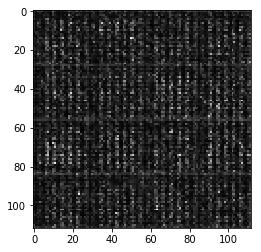

Epoch 1/2... Discriminator Loss: 1.4936... Generator Loss: 1.4707
Epoch 1/2... Discriminator Loss: 1.7339... Generator Loss: 1.2869
Epoch 1/2... Discriminator Loss: 1.5447... Generator Loss: 1.3704
Epoch 1/2... Discriminator Loss: 1.4783... Generator Loss: 1.4063
Epoch 1/2... Discriminator Loss: 1.5911... Generator Loss: 1.2621
Epoch 1/2... Discriminator Loss: 1.5990... Generator Loss: 1.3224
Epoch 1/2... Discriminator Loss: 1.6180... Generator Loss: 1.2457
Epoch 1/2... Discriminator Loss: 1.5408... Generator Loss: 1.3072
Epoch 1/2... Discriminator Loss: 1.6019... Generator Loss: 1.4279
Epoch 1/2... Discriminator Loss: 1.5683... Generator Loss: 1.2772


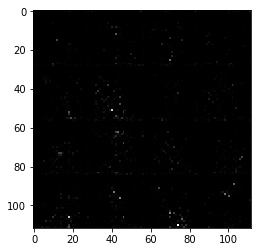

Epoch 1/2... Discriminator Loss: 1.5427... Generator Loss: 1.4675
Epoch 1/2... Discriminator Loss: 1.4234... Generator Loss: 1.4289
Epoch 1/2... Discriminator Loss: 1.3526... Generator Loss: 1.5816
Epoch 1/2... Discriminator Loss: 1.2579... Generator Loss: 1.5208
Epoch 1/2... Discriminator Loss: 1.1248... Generator Loss: 1.6126
Epoch 1/2... Discriminator Loss: 1.2253... Generator Loss: 1.3957
Epoch 1/2... Discriminator Loss: 1.6949... Generator Loss: 1.1639
Epoch 1/2... Discriminator Loss: 1.6177... Generator Loss: 1.0719
Epoch 1/2... Discriminator Loss: 1.5751... Generator Loss: 1.0824
Epoch 1/2... Discriminator Loss: 1.5210... Generator Loss: 1.1285


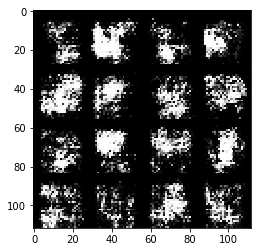

Epoch 1/2... Discriminator Loss: 1.4859... Generator Loss: 1.1821
Epoch 1/2... Discriminator Loss: 1.5378... Generator Loss: 1.0481
Epoch 1/2... Discriminator Loss: 1.4239... Generator Loss: 1.1482
Epoch 1/2... Discriminator Loss: 1.4917... Generator Loss: 1.1590
Epoch 1/2... Discriminator Loss: 1.3520... Generator Loss: 1.1145
Epoch 1/2... Discriminator Loss: 1.3524... Generator Loss: 1.1131
Epoch 1/2... Discriminator Loss: 1.3458... Generator Loss: 1.1653
Epoch 1/2... Discriminator Loss: 1.3840... Generator Loss: 1.1623
Epoch 1/2... Discriminator Loss: 1.4313... Generator Loss: 1.1445
Epoch 1/2... Discriminator Loss: 1.4081... Generator Loss: 1.2798


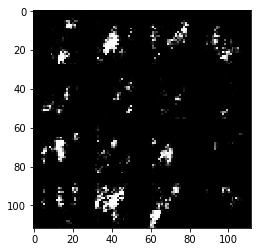

Epoch 1/2... Discriminator Loss: 1.3611... Generator Loss: 1.0541
Epoch 1/2... Discriminator Loss: 1.2691... Generator Loss: 1.1351
Epoch 1/2... Discriminator Loss: 1.3783... Generator Loss: 1.0868
Epoch 1/2... Discriminator Loss: 1.3336... Generator Loss: 1.0227
Epoch 1/2... Discriminator Loss: 1.4528... Generator Loss: 1.0155
Epoch 1/2... Discriminator Loss: 1.3326... Generator Loss: 1.1059
Epoch 1/2... Discriminator Loss: 1.3753... Generator Loss: 1.1850
Epoch 1/2... Discriminator Loss: 1.4001... Generator Loss: 1.0623
Epoch 1/2... Discriminator Loss: 1.3465... Generator Loss: 1.0701
Epoch 1/2... Discriminator Loss: 1.3301... Generator Loss: 1.0721


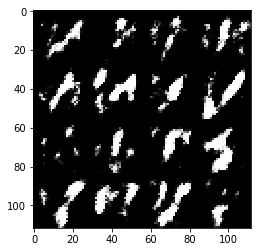

Epoch 1/2... Discriminator Loss: 1.3417... Generator Loss: 0.9995
Epoch 1/2... Discriminator Loss: 1.3404... Generator Loss: 1.1003
Epoch 1/2... Discriminator Loss: 1.3553... Generator Loss: 1.0882
Epoch 1/2... Discriminator Loss: 1.3375... Generator Loss: 1.1182
Epoch 1/2... Discriminator Loss: 1.3157... Generator Loss: 1.0446
Epoch 1/2... Discriminator Loss: 1.2548... Generator Loss: 1.0747
Epoch 1/2... Discriminator Loss: 1.3847... Generator Loss: 1.0701
Epoch 1/2... Discriminator Loss: 1.3000... Generator Loss: 1.0537
Epoch 1/2... Discriminator Loss: 1.2378... Generator Loss: 1.0950
Epoch 1/2... Discriminator Loss: 1.2651... Generator Loss: 1.2161


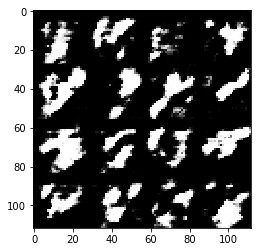

Epoch 1/2... Discriminator Loss: 1.3164... Generator Loss: 1.0953
Epoch 1/2... Discriminator Loss: 1.2789... Generator Loss: 1.0907
Epoch 1/2... Discriminator Loss: 1.2190... Generator Loss: 1.0977
Epoch 1/2... Discriminator Loss: 1.2777... Generator Loss: 1.1727
Epoch 1/2... Discriminator Loss: 1.2419... Generator Loss: 1.0614
Epoch 1/2... Discriminator Loss: 1.3355... Generator Loss: 1.0372
Epoch 1/2... Discriminator Loss: 1.3409... Generator Loss: 1.0371
Epoch 1/2... Discriminator Loss: 1.3611... Generator Loss: 0.9931
Epoch 1/2... Discriminator Loss: 1.2868... Generator Loss: 1.0423
Epoch 1/2... Discriminator Loss: 1.2389... Generator Loss: 1.2127


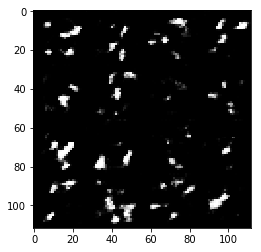

Epoch 1/2... Discriminator Loss: 1.3126... Generator Loss: 0.9554
Epoch 1/2... Discriminator Loss: 1.2671... Generator Loss: 1.0558
Epoch 1/2... Discriminator Loss: 1.2356... Generator Loss: 0.9865
Epoch 1/2... Discriminator Loss: 1.2752... Generator Loss: 1.0995
Epoch 1/2... Discriminator Loss: 1.2828... Generator Loss: 0.9793
Epoch 1/2... Discriminator Loss: 1.2133... Generator Loss: 1.1349
Epoch 1/2... Discriminator Loss: 1.2578... Generator Loss: 1.1871
Epoch 1/2... Discriminator Loss: 1.3442... Generator Loss: 1.0324
Epoch 1/2... Discriminator Loss: 1.2739... Generator Loss: 1.0207
Epoch 1/2... Discriminator Loss: 1.3420... Generator Loss: 0.9635


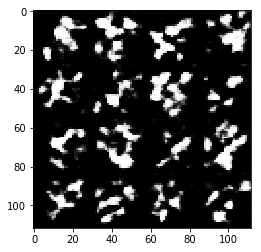

Epoch 1/2... Discriminator Loss: 1.2988... Generator Loss: 1.0186
Epoch 1/2... Discriminator Loss: 1.2707... Generator Loss: 1.1113
Epoch 1/2... Discriminator Loss: 1.2430... Generator Loss: 1.0295
Epoch 1/2... Discriminator Loss: 1.3052... Generator Loss: 0.9838
Epoch 1/2... Discriminator Loss: 1.3003... Generator Loss: 1.1646
Epoch 1/2... Discriminator Loss: 1.2477... Generator Loss: 1.0316
Epoch 1/2... Discriminator Loss: 1.3746... Generator Loss: 0.9913
Epoch 1/2... Discriminator Loss: 1.2810... Generator Loss: 1.0930
Epoch 1/2... Discriminator Loss: 1.2772... Generator Loss: 0.9164
Epoch 1/2... Discriminator Loss: 1.3293... Generator Loss: 1.0442


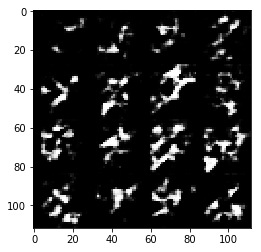

Epoch 1/2... Discriminator Loss: 1.3229... Generator Loss: 0.8940
Epoch 1/2... Discriminator Loss: 1.3159... Generator Loss: 0.9890
Epoch 1/2... Discriminator Loss: 1.3071... Generator Loss: 1.0434
Epoch 2/2... Discriminator Loss: 1.3562... Generator Loss: 0.9437
Epoch 2/2... Discriminator Loss: 1.3179... Generator Loss: 1.0055
Epoch 2/2... Discriminator Loss: 1.3463... Generator Loss: 0.9978
Epoch 2/2... Discriminator Loss: 1.3434... Generator Loss: 0.9475
Epoch 2/2... Discriminator Loss: 1.3068... Generator Loss: 1.0684
Epoch 2/2... Discriminator Loss: 1.2650... Generator Loss: 1.0009
Epoch 2/2... Discriminator Loss: 1.3837... Generator Loss: 0.9427
Epoch 2/2... Discriminator Loss: 1.3267... Generator Loss: 0.9936
Epoch 2/2... Discriminator Loss: 1.2632... Generator Loss: 1.0157
Epoch 2/2... Discriminator Loss: 1.3284... Generator Loss: 1.0364


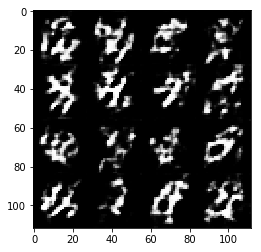

Epoch 2/2... Discriminator Loss: 1.3393... Generator Loss: 1.0180
Epoch 2/2... Discriminator Loss: 1.3236... Generator Loss: 0.9970
Epoch 2/2... Discriminator Loss: 1.2851... Generator Loss: 0.9423
Epoch 2/2... Discriminator Loss: 1.3290... Generator Loss: 0.9941
Epoch 2/2... Discriminator Loss: 1.2879... Generator Loss: 1.0835
Epoch 2/2... Discriminator Loss: 1.3101... Generator Loss: 0.9790
Epoch 2/2... Discriminator Loss: 1.3770... Generator Loss: 0.9652
Epoch 2/2... Discriminator Loss: 1.3268... Generator Loss: 0.9050
Epoch 2/2... Discriminator Loss: 1.3228... Generator Loss: 0.8719
Epoch 2/2... Discriminator Loss: 1.3930... Generator Loss: 0.9541


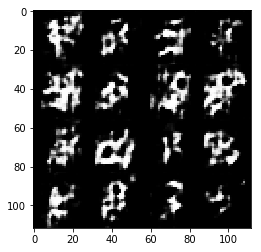

Epoch 2/2... Discriminator Loss: 1.2881... Generator Loss: 1.0301
Epoch 2/2... Discriminator Loss: 1.3101... Generator Loss: 0.9909
Epoch 2/2... Discriminator Loss: 1.3509... Generator Loss: 0.9079
Epoch 2/2... Discriminator Loss: 1.3778... Generator Loss: 1.0176
Epoch 2/2... Discriminator Loss: 1.3224... Generator Loss: 0.9222
Epoch 2/2... Discriminator Loss: 1.3473... Generator Loss: 0.8932
Epoch 2/2... Discriminator Loss: 1.3305... Generator Loss: 0.9422
Epoch 2/2... Discriminator Loss: 1.3509... Generator Loss: 0.9230
Epoch 2/2... Discriminator Loss: 1.3743... Generator Loss: 0.9842
Epoch 2/2... Discriminator Loss: 1.3731... Generator Loss: 0.9461


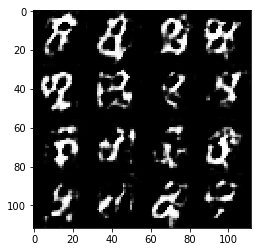

Epoch 2/2... Discriminator Loss: 1.3493... Generator Loss: 0.9861
Epoch 2/2... Discriminator Loss: 1.3506... Generator Loss: 0.8848
Epoch 2/2... Discriminator Loss: 1.3861... Generator Loss: 0.9365
Epoch 2/2... Discriminator Loss: 1.3135... Generator Loss: 0.9143
Epoch 2/2... Discriminator Loss: 1.3239... Generator Loss: 0.9138
Epoch 2/2... Discriminator Loss: 1.3583... Generator Loss: 0.8841
Epoch 2/2... Discriminator Loss: 1.3364... Generator Loss: 0.9203
Epoch 2/2... Discriminator Loss: 1.3406... Generator Loss: 0.9389
Epoch 2/2... Discriminator Loss: 1.3943... Generator Loss: 0.9028
Epoch 2/2... Discriminator Loss: 1.3528... Generator Loss: 0.9214


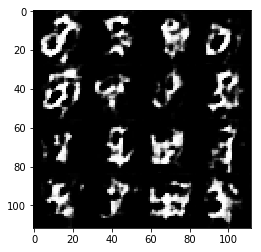

Epoch 2/2... Discriminator Loss: 1.3038... Generator Loss: 0.9648
Epoch 2/2... Discriminator Loss: 1.3807... Generator Loss: 0.9051
Epoch 2/2... Discriminator Loss: 1.3814... Generator Loss: 0.8703
Epoch 2/2... Discriminator Loss: 1.3400... Generator Loss: 0.8377
Epoch 2/2... Discriminator Loss: 1.3456... Generator Loss: 0.8778
Epoch 2/2... Discriminator Loss: 1.3362... Generator Loss: 0.9245
Epoch 2/2... Discriminator Loss: 1.3632... Generator Loss: 0.9135
Epoch 2/2... Discriminator Loss: 1.3399... Generator Loss: 0.8732
Epoch 2/2... Discriminator Loss: 1.3920... Generator Loss: 0.9152
Epoch 2/2... Discriminator Loss: 1.3316... Generator Loss: 0.9559


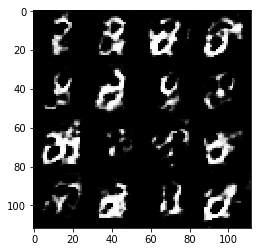

Epoch 2/2... Discriminator Loss: 1.3524... Generator Loss: 0.8934
Epoch 2/2... Discriminator Loss: 1.3691... Generator Loss: 0.9063
Epoch 2/2... Discriminator Loss: 1.3612... Generator Loss: 0.8589
Epoch 2/2... Discriminator Loss: 1.3689... Generator Loss: 0.8708
Epoch 2/2... Discriminator Loss: 1.3660... Generator Loss: 0.8928
Epoch 2/2... Discriminator Loss: 1.4033... Generator Loss: 0.8940
Epoch 2/2... Discriminator Loss: 1.3450... Generator Loss: 0.8810
Epoch 2/2... Discriminator Loss: 1.3357... Generator Loss: 0.8522
Epoch 2/2... Discriminator Loss: 1.3816... Generator Loss: 0.8865
Epoch 2/2... Discriminator Loss: 1.3545... Generator Loss: 0.9113


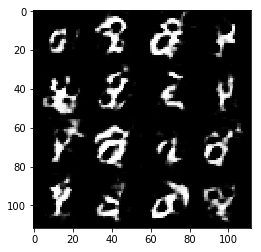

Epoch 2/2... Discriminator Loss: 1.3918... Generator Loss: 0.8893
Epoch 2/2... Discriminator Loss: 1.3513... Generator Loss: 0.8630
Epoch 2/2... Discriminator Loss: 1.3606... Generator Loss: 0.8675
Epoch 2/2... Discriminator Loss: 1.3641... Generator Loss: 0.9001
Epoch 2/2... Discriminator Loss: 1.3661... Generator Loss: 0.8880
Epoch 2/2... Discriminator Loss: 1.3740... Generator Loss: 0.8650
Epoch 2/2... Discriminator Loss: 1.3760... Generator Loss: 0.8581
Epoch 2/2... Discriminator Loss: 1.3657... Generator Loss: 0.8693
Epoch 2/2... Discriminator Loss: 1.3731... Generator Loss: 0.8584
Epoch 2/2... Discriminator Loss: 1.3874... Generator Loss: 0.8650


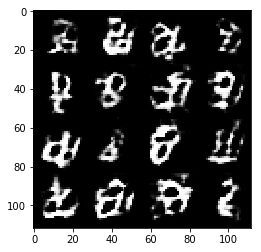

Epoch 2/2... Discriminator Loss: 1.3948... Generator Loss: 0.8275
Epoch 2/2... Discriminator Loss: 1.3671... Generator Loss: 0.8575
Epoch 2/2... Discriminator Loss: 1.4135... Generator Loss: 0.8714
Epoch 2/2... Discriminator Loss: 1.3784... Generator Loss: 0.8701
Epoch 2/2... Discriminator Loss: 1.3897... Generator Loss: 0.8678
Epoch 2/2... Discriminator Loss: 1.3727... Generator Loss: 0.8730
Epoch 2/2... Discriminator Loss: 1.3552... Generator Loss: 0.9243
Epoch 2/2... Discriminator Loss: 1.3813... Generator Loss: 0.9076
Epoch 2/2... Discriminator Loss: 1.3867... Generator Loss: 0.9141
Epoch 2/2... Discriminator Loss: 1.3627... Generator Loss: 0.8698


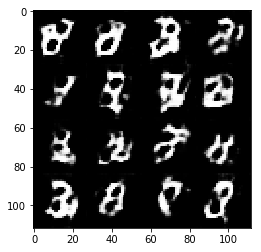

Epoch 2/2... Discriminator Loss: 1.3642... Generator Loss: 0.8369
Epoch 2/2... Discriminator Loss: 1.3978... Generator Loss: 0.8430
Epoch 2/2... Discriminator Loss: 1.3777... Generator Loss: 0.8064
Epoch 2/2... Discriminator Loss: 1.3568... Generator Loss: 0.8690
Epoch 2/2... Discriminator Loss: 1.3522... Generator Loss: 0.8433
Epoch 2/2... Discriminator Loss: 1.3760... Generator Loss: 0.8543
Epoch 2/2... Discriminator Loss: 1.3736... Generator Loss: 0.8357
Epoch 2/2... Discriminator Loss: 1.4065... Generator Loss: 0.8119
Epoch 2/2... Discriminator Loss: 1.3720... Generator Loss: 0.8462
Epoch 2/2... Discriminator Loss: 1.3565... Generator Loss: 0.8164


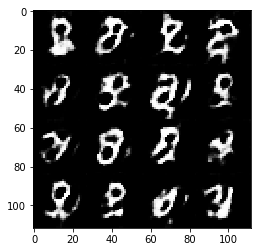

Epoch 2/2... Discriminator Loss: 1.4028... Generator Loss: 0.8681
Epoch 2/2... Discriminator Loss: 1.3828... Generator Loss: 0.8535
Epoch 2/2... Discriminator Loss: 1.3742... Generator Loss: 0.8774


In [130]:
batch_size = 64
z_dim = 100
learning_rate = 0.0003
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 1.9207... Generator Loss: 1.1362
Epoch 1/1... Discriminator Loss: 2.0553... Generator Loss: 1.1905
Epoch 1/1... Discriminator Loss: 1.8173... Generator Loss: 1.1513
Epoch 1/1... Discriminator Loss: 1.8571... Generator Loss: 0.9829
Epoch 1/1... Discriminator Loss: 1.7634... Generator Loss: 1.1503
Epoch 1/1... Discriminator Loss: 2.1317... Generator Loss: 1.1128
Epoch 1/1... Discriminator Loss: 1.7831... Generator Loss: 1.2633
Epoch 1/1... Discriminator Loss: 1.9079... Generator Loss: 1.2609
Epoch 1/1... Discriminator Loss: 1.7741... Generator Loss: 1.2394
Epoch 1/1... Discriminator Loss: 1.7152... Generator Loss: 1.3472


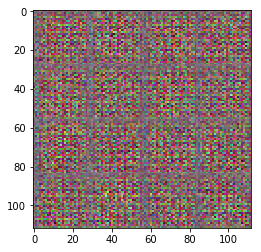

Epoch 1/1... Discriminator Loss: 2.2321... Generator Loss: 0.8741
Epoch 1/1... Discriminator Loss: 1.7022... Generator Loss: 1.2197
Epoch 1/1... Discriminator Loss: 1.5563... Generator Loss: 1.2271
Epoch 1/1... Discriminator Loss: 1.6336... Generator Loss: 1.1509
Epoch 1/1... Discriminator Loss: 1.8327... Generator Loss: 1.0139
Epoch 1/1... Discriminator Loss: 1.5498... Generator Loss: 1.2150
Epoch 1/1... Discriminator Loss: 1.4462... Generator Loss: 1.4577
Epoch 1/1... Discriminator Loss: 1.6586... Generator Loss: 0.9494
Epoch 1/1... Discriminator Loss: 1.4877... Generator Loss: 1.2531
Epoch 1/1... Discriminator Loss: 1.4422... Generator Loss: 1.2101


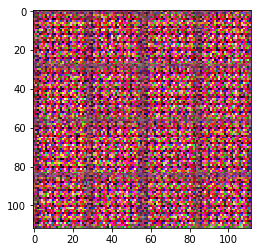

Epoch 1/1... Discriminator Loss: 1.3041... Generator Loss: 1.4167
Epoch 1/1... Discriminator Loss: 1.5482... Generator Loss: 1.0085
Epoch 1/1... Discriminator Loss: 1.3947... Generator Loss: 1.4371
Epoch 1/1... Discriminator Loss: 1.3141... Generator Loss: 1.6310
Epoch 1/1... Discriminator Loss: 1.1651... Generator Loss: 1.5789
Epoch 1/1... Discriminator Loss: 1.1929... Generator Loss: 1.4338
Epoch 1/1... Discriminator Loss: 1.3237... Generator Loss: 1.4352
Epoch 1/1... Discriminator Loss: 1.1051... Generator Loss: 1.4202
Epoch 1/1... Discriminator Loss: 1.1363... Generator Loss: 1.7809
Epoch 1/1... Discriminator Loss: 1.1995... Generator Loss: 1.3968


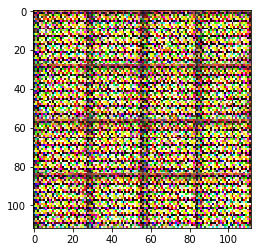

Epoch 1/1... Discriminator Loss: 1.1768... Generator Loss: 1.5016
Epoch 1/1... Discriminator Loss: 1.0802... Generator Loss: 1.5727
Epoch 1/1... Discriminator Loss: 1.2634... Generator Loss: 1.3269
Epoch 1/1... Discriminator Loss: 1.1322... Generator Loss: 1.6495
Epoch 1/1... Discriminator Loss: 1.1005... Generator Loss: 1.5243
Epoch 1/1... Discriminator Loss: 1.0689... Generator Loss: 1.8184
Epoch 1/1... Discriminator Loss: 1.0067... Generator Loss: 1.7213
Epoch 1/1... Discriminator Loss: 1.1392... Generator Loss: 1.3929
Epoch 1/1... Discriminator Loss: 1.1648... Generator Loss: 1.4787
Epoch 1/1... Discriminator Loss: 1.1084... Generator Loss: 1.5051


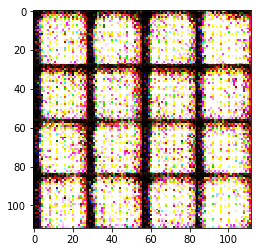

Epoch 1/1... Discriminator Loss: 1.1068... Generator Loss: 1.5870
Epoch 1/1... Discriminator Loss: 1.1287... Generator Loss: 1.5979
Epoch 1/1... Discriminator Loss: 1.0309... Generator Loss: 1.5605
Epoch 1/1... Discriminator Loss: 1.0409... Generator Loss: 1.6771
Epoch 1/1... Discriminator Loss: 0.9871... Generator Loss: 1.6244
Epoch 1/1... Discriminator Loss: 1.0785... Generator Loss: 1.6077
Epoch 1/1... Discriminator Loss: 1.0755... Generator Loss: 1.5603
Epoch 1/1... Discriminator Loss: 1.1104... Generator Loss: 1.5446
Epoch 1/1... Discriminator Loss: 1.0655... Generator Loss: 1.4811
Epoch 1/1... Discriminator Loss: 1.0744... Generator Loss: 1.6131


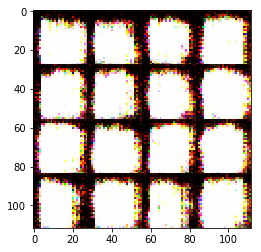

In [132]:
batch_size = 64
z_dim = 100
learning_rate = 0.0003
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.